In [ ]:
1.0 

In [1]:
import arff
import pandas as pd

def load_kdd_dataset(data_path):
    """Lectura del conjunto de datos NSL-KDD"""
    with open(data_path) as train_set:
        dataset = arff.load(train_set)
        atributos = [atrr[0] for atrr in dataset['attributes']]
        return pd.DataFrame(dataset["data"], columns =atributos)


In [3]:
df =  load_kdd_dataset("datasets\\datasets\\NSL-KDD\\KDDTrain+.arff") 
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8.0,udp,private,SF,105.0,145.0,0,0.0,0.0,0.0,...,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0.0,tcp,smtp,SF,2231.0,384.0,0,0.0,0.0,0.0,...,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0.0,tcp,klogin,S0,0.0,0.0,0,0.0,0.0,0.0,...,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

**2 Divisiòn del conjunto de datos**

*Se debe separar el conjunto de datos en los diferentes subconjuntos necesarios para realizar los procesos de entrenamiento*

In [10]:
#Separamos el conjunto de datos 60% train_set, 40% test_set
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size = 0.4, random_state = 42)

In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75583 entries, 98320 to 121958
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     75583 non-null  float64
 1   protocol_type                75583 non-null  object 
 2   service                      75583 non-null  object 
 3   flag                         75583 non-null  object 
 4   src_bytes                    75583 non-null  float64
 5   dst_bytes                    75583 non-null  float64
 6   land                         75583 non-null  object 
 7   wrong_fragment               75583 non-null  float64
 8   urgent                       75583 non-null  float64
 9   hot                          75583 non-null  float64
 10  num_failed_logins            75583 non-null  float64
 11  logged_in                    75583 non-null  object 
 12  num_compromised              75583 non-null  float64
 13  root_shell 

In [12]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50390 entries, 378 to 89600
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     50390 non-null  float64
 1   protocol_type                50390 non-null  object 
 2   service                      50390 non-null  object 
 3   flag                         50390 non-null  object 
 4   src_bytes                    50390 non-null  float64
 5   dst_bytes                    50390 non-null  float64
 6   land                         50390 non-null  object 
 7   wrong_fragment               50390 non-null  float64
 8   urgent                       50390 non-null  float64
 9   hot                          50390 non-null  float64
 10  num_failed_logins            50390 non-null  float64
 11  logged_in                    50390 non-null  object 
 12  num_compromised              50390 non-null  float64
 13  root_shell    

In [13]:
#seperamos el conjunto de datos de prueba en 50% de validaciòn y 50% de pruebas
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state = 42)

In [14]:
val_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25195 entries, 115297 to 79319
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25195 non-null  float64
 1   protocol_type                25195 non-null  object 
 2   service                      25195 non-null  object 
 3   flag                         25195 non-null  object 
 4   src_bytes                    25195 non-null  float64
 5   dst_bytes                    25195 non-null  float64
 6   land                         25195 non-null  object 
 7   wrong_fragment               25195 non-null  float64
 8   urgent                       25195 non-null  float64
 9   hot                          25195 non-null  float64
 10  num_failed_logins            25195 non-null  float64
 11  logged_in                    25195 non-null  object 
 12  num_compromised              25195 non-null  float64
 13  root_shell 

In [15]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25195 entries, 34615 to 84708
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25195 non-null  float64
 1   protocol_type                25195 non-null  object 
 2   service                      25195 non-null  object 
 3   flag                         25195 non-null  object 
 4   src_bytes                    25195 non-null  float64
 5   dst_bytes                    25195 non-null  float64
 6   land                         25195 non-null  object 
 7   wrong_fragment               25195 non-null  float64
 8   urgent                       25195 non-null  float64
 9   hot                          25195 non-null  float64
 10  num_failed_logins            25195 non-null  float64
 11  logged_in                    25195 non-null  object 
 12  num_compromised              25195 non-null  float64
 13  root_shell  

In [18]:
print("longitud del training Set: (60%)", len(train_set))
print("longitud del valdiation Set: (60%)", len(val_set))
print("longitud del test Set: (60%)", len(test_set))
print("longitud total: (60%)", len(df))

longitud del training Set: (60%) 75583
longitud del valdiation Set: (60%) 25195
longitud del test Set: (60%) 25195
longitud total: (60%) 125973


**3. Particionado**

*El parametro suffle*
* shuffle --> True: Los datos se barajan antes de realizar la divisiòn para tener una represnetaciòn en las particiones, VIENE PREDETERMINADO
* shuffle -> False: Los datos no se barajan antes de realizar la divisiòn para tener una represnetaciòn en las particiones

In [ ]:
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state = 42)

**El parametro stratify**

* Es para tener subconjuntos homogeneos

In [ ]:
#val_set, test_set = train_test_split(test_set, test_size=0.5, random_state = 42, stratify =df["protocol_type"])

*4. Generaciòn de una funciòn de particionado*

In [26]:
def train_val_test_split(df,rstate=42, shuffle = True, stratify = None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(df, test_size = 0.4, random_state = rstate, shuffle = shuffle, stratify = strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(test_set, test_size = 0.5, random_state = rstate, shuffle = shuffle, stratify = strat)
    return (train_set,val_set,test_set)


In [27]:
print("longitud del conjunto" ,len(df))

longitud del conjunto 125973


In [28]:
train_val_test_split(df, stratify="protocol_type")

(        duration protocol_type  service flag  src_bytes  dst_bytes land  \
 113467       0.0           tcp     http   SF      407.0    53508.0    0   
 31899        0.0           tcp  private   S0        0.0        0.0    0   
 108116       0.0           tcp     http   SF      304.0      636.0    0   
 89913        0.0           tcp  private   S0        0.0        0.0    0   
 106319       0.0          icmp    eco_i   SF        8.0        0.0    0   
 ...          ...           ...      ...  ...        ...        ...  ...   
 64559        0.0           tcp   systat   S0        0.0        0.0    0   
 67272        0.0           tcp     http   SF      210.0      736.0    0   
 32452        3.0           tcp     smtp   SF      889.0      328.0    0   
 112657       0.0           tcp     http   SF      284.0      444.0    0   
 99030        0.0           tcp     http   SF      209.0     3127.0    0   
 
         wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
 113467             0

In [29]:
print("longitud del training Set: (60%)", len(train_set))
print("longitud del valdiation Set: (60%)", len(val_set))
print("longitud del test Set: (60%)", len(test_set))
print("longitud total: (60%)", len(df))

longitud del training Set: (60%) 75583
longitud del valdiation Set: (60%) 25195
longitud del test Set: (60%) 25195
longitud total: (60%) 125973


In [30]:
#Comprobamos si se ha mantenido la proporcion
import matplotlib as mp


<AxesSubplot:>

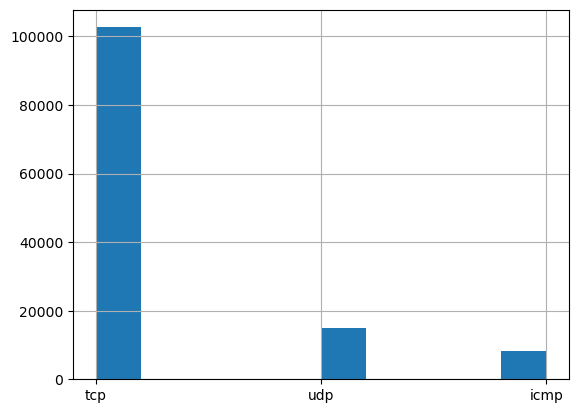

In [32]:
df['protocol_type'].hist()

<AxesSubplot:>

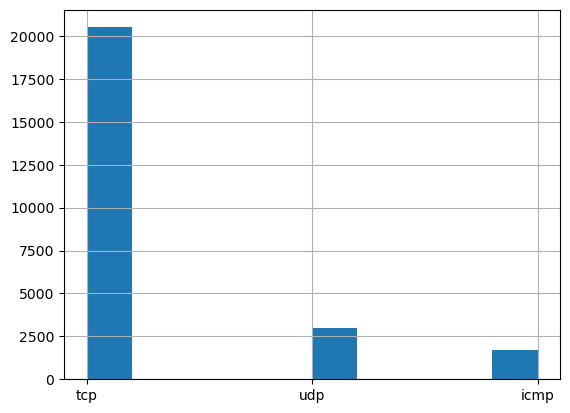

In [33]:
val_set['protocol_type'].hist()

<AxesSubplot:>

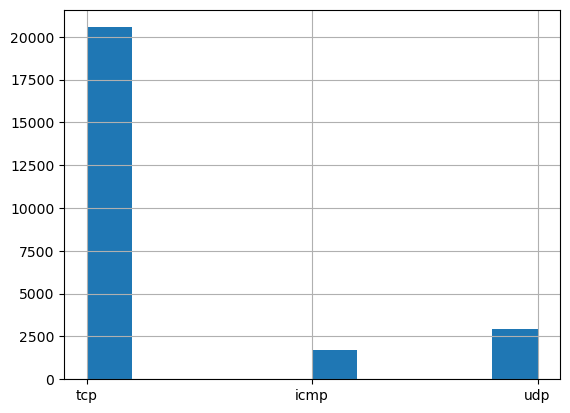

In [34]:
test_set['protocol_type'].hist()

<AxesSubplot:>

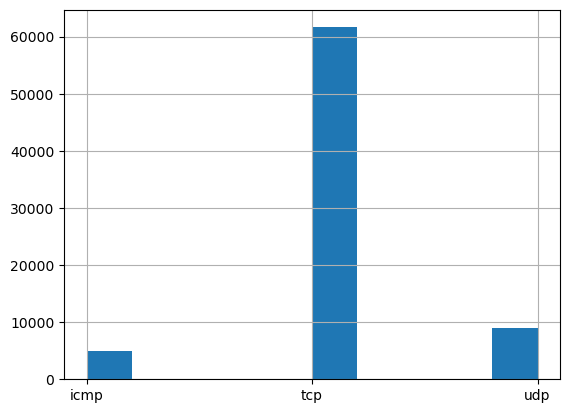

In [36]:
train_set['protocol_type'].hist()